In [1]:
import pandas as pd

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Set plot style
sns.set(color_codes=True)

In [5]:
df = pd.read_csv('/content/data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


In [6]:
# Check the structure of the dataset
print(df.info())
print(df['churn'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 63 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          14606 non-null  object 
 1   cons_12m                                    14606 non-null  float64
 2   cons_gas_12m                                14606 non-null  float64
 3   cons_last_month                             14606 non-null  float64
 4   forecast_cons_12m                           14606 non-null  float64
 5   forecast_discount_energy                    14606 non-null  float64
 6   forecast_meter_rent_12m                     14606 non-null  float64
 7   forecast_price_energy_off_peak              14606 non-null  float64
 8   forecast_price_energy_peak                  14606 non-null  float64
 9   forecast_price_pow_off_peak                 14606 non-null  float64
 10  has_gas   

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# Make a copy of the dataset
train_df = df.copy()

# Separate the target variable (churn) from the features
y = train_df['churn']
X = train_df.drop(columns=['id', 'churn'])

In [10]:
# Display the shapes of features and target
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (14606, 61)
Target shape: (14606,)


In [11]:
# Perform a 75-25% split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [12]:
# Display training and testing shapes
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (10954, 61)
Test set shape: (3652, 61)


# Model training

In [14]:
# Import the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100, random_state=42, max_depth=10, class_weight="balanced"
)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Print a message indicating training completion
print("Model training completed!")


Model training completed!


# Model Evaluation

In [16]:
# Import required evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Generate predictions on the test data
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
# Provide both y_test and y_pred to classification_report
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred)) #provide y_test and y_pred to confusion_matrix


Accuracy: 0.85
ROC-AUC Score: 0.69

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92      3297
           1       0.28      0.32      0.30       355

    accuracy                           0.85      3652
   macro avg       0.60      0.62      0.61      3652
weighted avg       0.86      0.85      0.86      3652


Confusion Matrix:
 [[2998  299]
 [ 241  114]]


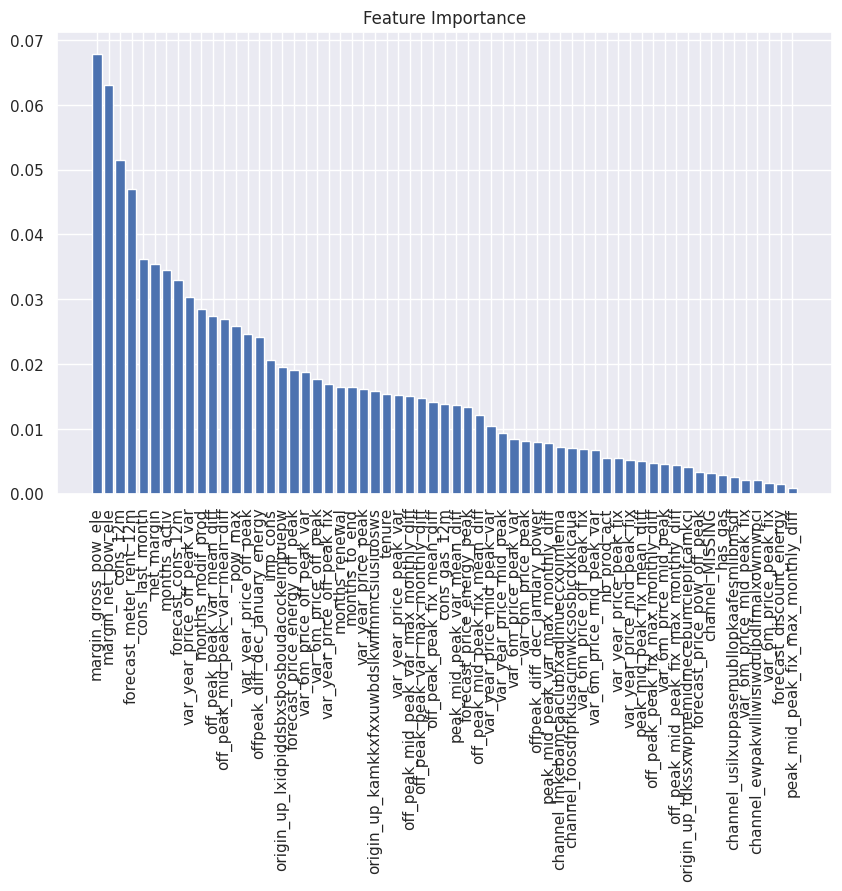

In [17]:
# Import visualization library
import matplotlib.pyplot as plt

# Get feature importance values from the model
importances = rf_model.feature_importances_
feature_names = X.columns
sorted_indices = importances.argsort()[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[sorted_indices], rotation=90)
plt.title('Feature Importance')
plt.show()


In [18]:
# Import SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train the Random Forest model on the balanced data
rf_model_balanced = RandomForestClassifier(
    n_estimators=100, random_state=42, max_depth=10, class_weight=None
)
rf_model_balanced.fit(X_train_balanced, y_train_balanced)

# Evaluate the model
y_pred_balanced = rf_model_balanced.predict(X_test)
y_pred_proba_balanced = rf_model_balanced.predict_proba(X_test)[:, 1]

print("Classification Report (Balanced):\n", classification_report(y_test, y_pred_balanced))
print("ROC-AUC Score (Balanced):", roc_auc_score(y_test, y_pred_proba_balanced))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Classification Report (Balanced):
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      3297
           1       0.27      0.16      0.20       355

    accuracy                           0.88      3652
   macro avg       0.59      0.56      0.57      3652
weighted avg       0.85      0.88      0.86      3652

ROC-AUC Score (Balanced): 0.6798446731343475
